In [29]:
import pandas as pd

In [30]:
online = pd.read_excel("Online_Retail.xlsx")

In [31]:
online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [32]:
online.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


Tout d'abord, nous créons une fonction qui tronque un objet date donné à un premier jour du mois. Ensuite, nous l'appliquons à InvoiceDate et créons une colonne InvoiceMonth. Ensuite, nous créons un objet groupby() avec CustomerID et utilisons la colonne InvoiceMonth pour la manipulation ultérieure. Enfin, nous utilisons transform() avec une fonction min() pour attribuer la plus petite valeur InvoiceMonth à chaque client. Avec juste cela, nous avons attribué la cohorte du mois d'acquisition à chaque client. Regardons les données. Nous avons ajouté deux colonnes - InvoiceMonth et CohortMonth. Maintenant, calculons le décalage horaire !

In [33]:
import datetime as dt

In [34]:

def get_month(x): return dt.datetime(x.year, x.month, 1)
online['InvoiceMonth'] = online['InvoiceDate'].apply(get_month)
grouping = online.groupby('CustomerID')['InvoiceMonth']
online['CohortMonth'] = grouping.transform('min')
online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01


Avant de pouvoir calculer le décalage horaire, nous allons d'abord créer une fonction d'assistance qui extraira les valeurs entières de l'année, du mois et du jour à partir d'un objet datetime ().

In [35]:
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day

Maintenant, nous allons calculer le nombre de mois entre toute transaction et la première transaction pour chaque client. Nous utiliserons les valeurs InvoiceMonth et CohortMonth pour ce faire. Nous allons commencer par créer deux objets avec des valeurs entières d'année et de mois à partir de chacune des variables InvoiceMonth et CohortMonth. Ensuite, nous calculerons les différences en années et en mois entre eux. Enfin, nous convertirons la différence totale en mois en multipliant la différence d'année par 12 et en les additionnant. Vous pouvez voir qu'il y a un "+1" à la fin. Nous faisons cela pour que le premier mois soit marqué comme 1 au lieu de 0 pour une interprétation plus facile. Vous pouvez voir que la nouvelle colonne est ajoutée. Maintenant, extrayons quelques métriques !

 

In [36]:
invoice_year, invoice_month, _ = get_date_int(online, 'InvoiceMonth')
cohort_year, cohort_month, _ = get_date_int(online, 'CohortMonth')
years_diff = invoice_year - cohort_year
months_diff = invoice_month - cohort_month
online['CohortIndex'] = years_diff * 12 + months_diff + 1
online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01,1.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01,1.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1.0


Nous allons maintenant calculer le nombre de clients actifs mensuels dans chaque cohorte. Tout d'abord, nous allons créer un objet groupby avec CohortMonth et CohortIndex. Ensuite, nous compterons le nombre de clients dans chaque groupe 

Attribuer une valeur de décalage horaire

In [37]:
grouping = online.groupby(['CohortMonth', 'CohortIndex'])
cohort_data = grouping['CustomerID'].apply(pd.Series.nunique)
cohort_data = cohort_data.reset_index()
cohort_counts = cohort_data.pivot(index='CohortMonth',
columns='CohortIndex',
values='CustomerID')
print(cohort_counts)

CohortIndex   1.0    2.0    3.0    4.0    5.0    6.0    7.0    8.0    9.0   \
CohortMonth                                                                  
2010-12-01   948.0  362.0  317.0  367.0  341.0  376.0  360.0  336.0  336.0   
2011-01-01   421.0  101.0  119.0  102.0  138.0  126.0  110.0  108.0  131.0   
2011-02-01   380.0   94.0   73.0  106.0  102.0   94.0   97.0  107.0   98.0   
2011-03-01   440.0   84.0  112.0   96.0  102.0   78.0  116.0  105.0  127.0   
2011-04-01   299.0   68.0   66.0   63.0   62.0   71.0   69.0   78.0   25.0   
2011-05-01   279.0   66.0   48.0   48.0   60.0   68.0   74.0   29.0    NaN   
2011-06-01   235.0   49.0   44.0   64.0   58.0   79.0   24.0    NaN    NaN   
2011-07-01   191.0   40.0   39.0   44.0   52.0   22.0    NaN    NaN    NaN   
2011-08-01   167.0   42.0   42.0   42.0   23.0    NaN    NaN    NaN    NaN   
2011-09-01   298.0   89.0   97.0   36.0    NaN    NaN    NaN    NaN    NaN   
2011-10-01   352.0   93.0   46.0    NaN    NaN    NaN    NaN    

La rétention mesure le nombre de clients de chacune des cohortes qui sont revenus dans les mois suivants. Nous utiliserons la base de données appelée cohort_counts que nous avons créée. Notre première étape consiste à sélectionner la première colonne qui correspond au nombre total de clients dans la cohorte.



1. Stockez la première colonne en tant que cohort_sizes

In [38]:
cohort_sizes = cohort_counts.iloc[:,0]

2. Divisez toutes les valeurs de la table cohort_counts par cohort_sizes

In [39]:
retention = cohort_counts.divide(cohort_sizes, axis=0)
retention.round(3) * 100

CohortIndex,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
CohortMonth,,,,,,,,,,,,,
2010-12-01,100.0,38.2,33.4,38.7,36.0,39.7,38.0,35.4,35.4,39.5,37.3,50.0,27.4
2011-01-01,100.0,24.0,28.3,24.2,32.8,29.9,26.1,25.7,31.1,34.7,36.8,15.0,NaN
2011-02-01,100.0,24.7,19.2,27.9,26.8,24.7,25.5,28.2,25.8,31.3,9.2,NaN,NaN
2011-03-01,100.0,19.1,25.5,21.8,23.2,17.7,26.4,23.9,28.9,8.9,NaN,NaN,NaN
2011-04-01,100.0,22.7,22.1,21.1,20.7,23.7,23.1,26.1,8.4,NaN,NaN,NaN,NaN
2011-05-01,100.0,23.7,17.2,17.2,21.5,24.4,26.5,10.4,NaN,NaN,NaN,NaN,NaN
2011-06-01,100.0,20.9,18.7,27.2,24.7,33.6,10.2,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,100.0,20.9,20.4,23.0,27.2,11.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,100.0,25.1,25.1,25.1,13.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Construire la Heatmap

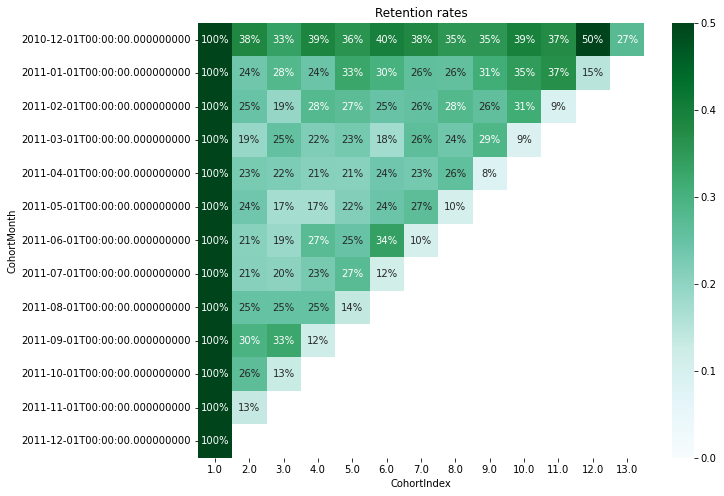

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
plt.title('Retention rates')
sns.heatmap(data = retention,
annot = True,
fmt = '.0%',
vmin = 0.0,
vmax = 0.5,
cmap = 'BuGn')
plt.show()

# Recency, frequency, monetary (RFM) segmentation

Pour ce faire, nous allons calculer trois métriques de comportement client - Récence - qui mesure la date du dernier achat de chaque client, Fréquence - qui mesure le nombre d'achats effectués par le client au cours des 12 derniers mois, Et MonetaryValue - mesure combien a le client a dépensé au cours des 12 derniers mois. Nous utiliserons ces valeurs pour affecter les clients aux segments RFM.



Nouvelle colonne TotalSum = Quantity x UnitPrice

In [41]:
online["TotalSum"] = online["Quantity"]*online["UnitPrice"]

In [42]:
print('Min:{}; Max:{}'.format(min(online.InvoiceDate),
max(online.InvoiceDate)))

Min:2010-12-01 08:26:00; Max:2011-12-09 12:50:00


In [43]:
snapshot_date = max(online.InvoiceDate) + dt.timedelta(days=1)

In [44]:
#Aggregate data on a customer level
datamart = online.groupby(['CustomerID']).agg({
'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
'InvoiceNo': 'count',
'TotalSum': 'sum'})
# Rename columns for easier interpretation
datamart.rename(columns = {'InvoiceDate': 'Recency',
'InvoiceNo': 'Frequency',
'TotalSum': 'MonetaryValue'}, inplace=True)
# Check the first rows
datamart.head()

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346.0,326,2,0.00
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40


# Recency quartile

In [45]:
r_labels = range(4, 0, -1)
r_quartiles = pd.qcut(datamart['Recency'], 4, labels = r_labels)
datamart = datamart.assign(R = r_quartiles.values)
datamart

,Recency,Frequency,MonetaryValue,R
CustomerID,,,,
12346.0,326,2,0.00,1
12347.0,2,182,4310.00,4
12348.0,75,31,1797.24,2
12349.0,19,73,1757.55,3
12350.0,310,17,334.40,1
...,...,...,...,...
18280.0,278,10,180.60,1
18281.0,181,7,80.82,1
18282.0,8,13,176.60,4


# Frequency and monetary quartiles

In [46]:
f_labels = range(1,5)
m_labels = range(1,5)
f_quartiles = pd.qcut(datamart['Frequency'], 4, labels = f_labels)
m_quartiles = pd.qcut(datamart['MonetaryValue'], 4, labels = m_labels)
datamart = datamart.assign(F = f_quartiles.values)
datamart = datamart.assign(M = m_quartiles.values)
datamart.head()

,Recency,Frequency,MonetaryValue,R,F,M
CustomerID,,,,,,
12346.0,326,2,0.00,1,1,1
12347.0,2,182,4310.00,4,4,4
12348.0,75,31,1797.24,2,2,4
12349.0,19,73,1757.55,3,3,4
12350.0,310,17,334.40,1,1,2


# Construire le segment RFM et le score RFM

In [49]:
def join_rfm(x): return str(x['R']) + str(x['F']) + str(x['M'])
datamart['RFM_Segment'] = datamart.apply(join_rfm, axis=1)
datamart['RFM_Score'] = datamart[['R','F','M']].sum(axis=1)



In [50]:
datamart.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score
CustomerID,,,,,,,,
12346.0,326,2,0.00,1,1,1,111,3
12347.0,2,182,4310.00,4,4,4,444,12
12348.0,75,31,1797.24,2,2,4,224,8
12349.0,19,73,1757.55,3,3,4,334,10
12350.0,310,17,334.40,1,1,2,112,4


In [51]:
datamart.groupby('RFM_Score').agg({
'Recency': 'mean',
'Frequency': 'mean',
'MonetaryValue': ['mean', 'count']}).round(1)

Recency Frequency MonetaryValue      
             mean      mean          mean count
RFM_Score                                      
3           264.8       7.8         109.1   392
4           174.5      13.9         227.1   391
5           153.0      21.2         346.8   517
6            94.3      28.5         491.8   468
7            78.8      39.7         724.2   447
8            62.7      57.0         974.7   467
9            44.2      79.0        1369.6   411
10           31.3     115.3        1894.0   440
11           20.5     193.9        3845.7   368
12            6.7     371.8        8850.7   471

In [61]:
def segment_me(df):
    if df['RFM_Score'] >= 11:
        return 'VIP'
    elif (df['RFM_Score'] >= 8) and (df['RFM_Score'] < 11):
        return 'Gold'
    elif (df['RFM_Score'] >= 5) and (df['RFM_Score'] < 8):
        return 'Silver'
    
    else:
        return 'Bronze'
datamart['General_Segment'] = datamart.apply(segment_me, axis=1)
datamart_group= datamart.groupby('General_Segment').agg({
'Recency': 'mean',
'Frequency': 'mean',
'MonetaryValue': ['mean', 'count']}).round(1)
datamart_group = datamart_group.reset_index()
datamart_group

General_Segment Recency Frequency MonetaryValue      
                     mean      mean          mean count
0          Bronze   219.7      10.9         168.0   783
1            Gold    46.5      83.3        1404.8  1318
2          Silver   110.7      29.3         512.0  1432
3             VIP    12.8     293.8        6655.4   839

In [58]:
datamart_group.columns

MultiIndex([('General_Segment',      ''),
            (        'Recency',  'mean'),
            (      'Frequency',  'mean'),
            (  'MonetaryValue',  'mean'),
            (  'MonetaryValue', 'count')],
           )

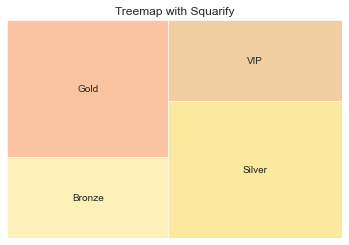

In [62]:
import squarify
sns.set_style(style="whitegrid") # set seaborn plot style
sizes= datamart_group[('MonetaryValue', 'count')].values# proportions of the categories
label=datamart_group["General_Segment"]

colors=['#fae588','#f79d65','#f9dc5c','#e8ac65','#e76f51','#ef233c','#b7094c'] #color palette

squarify.plot(sizes=sizes, label=label, alpha=0.6,color=colors).set(title='Treemap with Squarify')
plt.axis('off')
plt.show()

In [64]:
datamart.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score,General_Segment
CustomerID,,,,,,,,,
12346.0,326,2,0.00,1,1,1,111,3,Bronze
12347.0,2,182,4310.00,4,4,4,444,12,VIP
12348.0,75,31,1797.24,2,2,4,224,8,Gold
12349.0,19,73,1757.55,3,3,4,334,10,Gold
12350.0,310,17,334.40,1,1,2,112,4,Bronze


In [74]:
datamart_rfm = datamart[["Recency","Frequency","MonetaryValue"]]
datamart_rfm = datamart_rfm[datamart_rfm["MonetaryValue"]>0]

In [75]:
datamart_rfm.describe()

,Recency,Frequency,MonetaryValue
count,4322.000000,4322.000000,4.322000e+03
mean,90.343591,94.059695,1.923483e+03
std,99.133565,233.621415,8.263128e+03
min,1.000000,1.000000,1.776357e-15
25%,17.000000,18.000000,3.022925e+02
50%,49.500000,42.000000,6.575500e+02
75%,138.000000,102.750000,1.625740e+03
max,374.000000,7983.000000,2.794890e+05


In [76]:
import numpy as np
datamart_log = np.log(datamart_rfm)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(datamart_log)
datamart_normalized = scaler.transform(datamart_log)

# Running k-means

In [77]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=1)

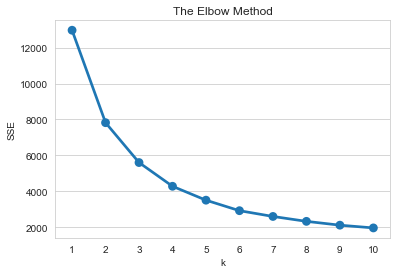

In [80]:
# Import key libraries
from sklearn.cluster import KMeans
import seaborn as sns
from matplotlib import pyplot as plt
# Fit KMeans and calculate SSE for each *k*
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(datamart_normalized)
    sse[k] = kmeans.inertia_
# sum of squared distances to closest cluster center
# Plot SSE for each *k*
plt.title('The Elbow Method')
plt.xlabel('k'); plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()